<h1></h1>
<h1><center>Air Quality Index Prediction </center></h1>

## Introduction

Air pollution has a significant impact on the environment. Monitoring and predicting the Air Quality Index (AQI) helps us assess the quality of air and take precautionary measures to minimize exposure to pollutants.


---
### **Features**:
- **PM2.5**: Particulate matter.
- **PM10**: Particulate matter.
- **NO2**: Nitrogen Dioxide.
- **CO**: Carbon Monoxide.
- **SO2**: Sulfur Dioxide.
- **O3**: Ozone.

---


# **Problem Statement**
Information on air quality is frequently very unclear, which makes it challenging for peoples to respond to pollution flows. Data on air quality is accessible, but it typically absences the specifics required to identify patterns as take preventative action. That is the issue what we seek to resolve by our project. By developing a model that forecasts the quality of the air in Karachi. The system's precise daily projections can aid people, and the officials in better understanding pollution patterns and implementing effective responses.

# **Business Questions**


1. How does air quality vary over time?
2. Is there specific months when air  pollution levels are consistently higher?
3. Is there specific season when pollution levels are consistently higher?
4. Which pollutants have the most significant impact on AQI (e.g., PM2.5, PM10, CO, NO2)?
5. What are the primary sources of the key air pollutants?
6. Can the model accurately predict future AQI levels to help authorities and individuals prepare for poor air quality days?
7. How many days per year are categorized as "unhealthy" or worse according to AQI standards?
8. What steps can individuals take to minimize exposure during periods of poor air quality?








# **Dataset**
Ahmedabad India data set downloaded from Kaggle was used for training while for testing Karachi data set was scrapped out of many datasets and combined.



In [9]:
import pandas as pd
data = pd.read_csv('ahmedabad_aqi.csv')
data.shape

(108035, 16)

In [10]:
df = pd.read_csv('/content/processed_air_quality_data.csv')
df.shape


(79, 7)

Importing necessary Python libraries and loads a dataset for further analysis.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('ahmedabad_aqi.csv')


In [12]:
data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [13]:
data.shape

(108035, 16)

In [14]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


Checking missing values in the dataset.

In [16]:
data.isnull().sum()

,0
StationId,0
Date,0
PM2.5,21625
PM10,42706
NO,17106
NO2,16547
NOx,15500
NH3,48105
CO,12998
SO2,25204


Handling missing values

In [17]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.median()))
data

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,132.0,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,2020-06-27,8.65,16.46,10.29,27.21,26.66,23.59,0.69,4.36,30.59,1.32,7.26,0.40,50.0,Good
108031,WB013,2020-06-28,11.80,18.47,10.29,27.21,26.66,23.59,0.68,3.49,38.95,1.42,7.92,0.40,65.0,Satisfactory
108032,WB013,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,0.40,63.0,Satisfactory
108033,WB013,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,0.40,57.0,Satisfactory


In [18]:
data.sort_values('Date', inplace=True)
data.interpolate(method='linear', inplace=True)
data

<ipython-input-18-6a4507376b0e>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear', inplace=True)


,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
20277,DL013,2015-01-01,200.96,122.09,17.06,12.39,24.73,42.98,21.82,8.91,30.84,1.21,4.33,0.4,364.0,Very Poor
94367,TN003,2015-01-01,55.95,122.09,6.96,11.08,10.55,4.59,1.36,7.62,30.84,1.21,4.33,0.4,132.0,NaN
70838,MH005,2015-01-01,55.95,122.09,10.29,27.21,27.38,23.59,0.00,8.95,30.84,0.00,0.00,0.0,132.0,NaN
64820,KA009,2015-01-01,55.95,122.09,2.51,10.79,7.14,20.36,1.15,5.08,30.84,1.21,1.15,0.4,132.0,NaN
96376,TN004,2015-01-01,55.95,122.09,33.13,22.56,36.86,23.59,0.40,12.36,18.85,0.17,4.33,0.4,132.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,DL030,2020-07-01,18.69,110.56,3.60,7.34,10.94,23.59,2.08,8.95,29.97,0.00,0.25,0.0,101.0,Moderate
43652,DL031,2020-07-01,38.00,114.00,1.35,27.12,15.53,11.50,0.90,6.47,9.93,1.21,4.33,0.4,73.0,Satisfactory
44534,DL032,2020-07-01,55.95,143.00,1.42,27.21,1.20,100.53,0.91,7.38,12.80,1.48,5.85,0.4,108.0,Moderate
100779,UP012,2020-07-01,20.93,122.09,23.36,42.93,10.97,23.59,0.63,8.95,22.53,0.12,0.00,0.4,68.0,Satisfactory


In [19]:
data.drop(columns=['Xylene'], inplace=True)

In [20]:
data

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
20277,DL013,2015-01-01,200.96,122.09,17.06,12.39,24.73,42.98,21.82,8.91,30.84,1.21,4.33,364.0,Very Poor
94367,TN003,2015-01-01,55.95,122.09,6.96,11.08,10.55,4.59,1.36,7.62,30.84,1.21,4.33,132.0,NaN
70838,MH005,2015-01-01,55.95,122.09,10.29,27.21,27.38,23.59,0.00,8.95,30.84,0.00,0.00,132.0,NaN
64820,KA009,2015-01-01,55.95,122.09,2.51,10.79,7.14,20.36,1.15,5.08,30.84,1.21,1.15,132.0,NaN
96376,TN004,2015-01-01,55.95,122.09,33.13,22.56,36.86,23.59,0.40,12.36,18.85,0.17,4.33,132.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,DL030,2020-07-01,18.69,110.56,3.60,7.34,10.94,23.59,2.08,8.95,29.97,0.00,0.25,101.0,Moderate
43652,DL031,2020-07-01,38.00,114.00,1.35,27.12,15.53,11.50,0.90,6.47,9.93,1.21,4.33,73.0,Satisfactory
44534,DL032,2020-07-01,55.95,143.00,1.42,27.21,1.20,100.53,0.91,7.38,12.80,1.48,5.85,108.0,Moderate
100779,UP012,2020-07-01,20.93,122.09,23.36,42.93,10.97,23.59,0.63,8.95,22.53,0.12,0.00,68.0,Satisfactory


# **Data Cleaning**

In [21]:
# Data Cleaning
def clean_data(data):
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.median()))
    data.dropna(subset=['Date'], inplace=True)
    data.reset_index(drop=True, inplace=True)
    return data

data = clean_data(data)

# **visualization**  Exploratory Data Analysis (EDA)


1. Time series plot

1. How does air quality vary over time (daily, monthly, or annually)?

Insight: Air quality exhibits daily and monthly fluctuations. Specific pollutants like PM2.5 and PM10 show spikes during certain months, likely related to seasonal activities such as winter heating or increased industrial output.

Cmpare the trends of PM2.5 and PM10 pollution over the recorded time period.

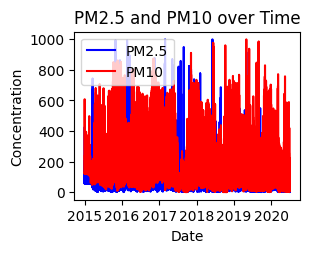

In [22]:
# Time Series Plots for PM2.5, PM10, NO, NO2, O3, CO
plt.subplot(2, 2, 1)
plt.plot(data['Date'], data['PM2.5'], label='PM2.5', color='blue')
plt.plot(data['Date'], data['PM10'], label='PM10', color='red')
plt.title('PM2.5 and PM10 over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()


Insight:
Limit outdoor activities during high AQI periods.
Use air purifiers and masks.

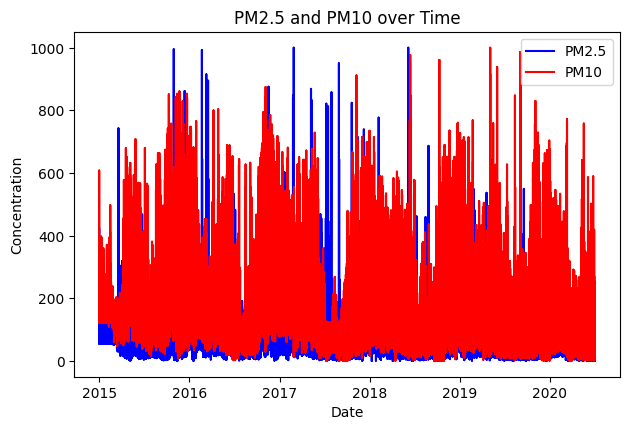

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(data['Date'], data['PM2.5'], label='PM2.5', color='blue')
plt.plot(data['Date'], data['PM10'], label='PM10', color='red')
plt.title('PM2.5 and PM10 over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.tight_layout()
plt.show()

Compare the trends in NO and NO2 pollution levels over time

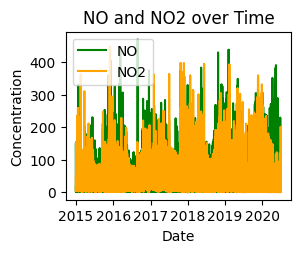

In [24]:
plt.subplot(2, 2, 2)
plt.plot(data['Date'], data['NO'], label='NO', color='green')
plt.plot(data['Date'], data['NO2'], label='NO2', color='orange')
plt.title('NO and NO2 over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()

compare the trends in O3 and CO concentrations over time.

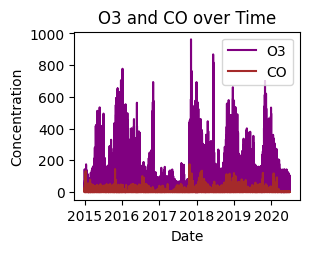

In [25]:
plt.subplot(2, 2, 3)
plt.plot(data['Date'], data['O3'], label='O3', color='purple')
plt.plot(data['Date'], data['CO'], label='CO', color='brown')
plt.title('O3 and CO over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()

In [26]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

  2. Boxplot

Display one boxplot for each air quality metric: PM2.5, PM10, NO, NO2, SO2, CO, and AQI.


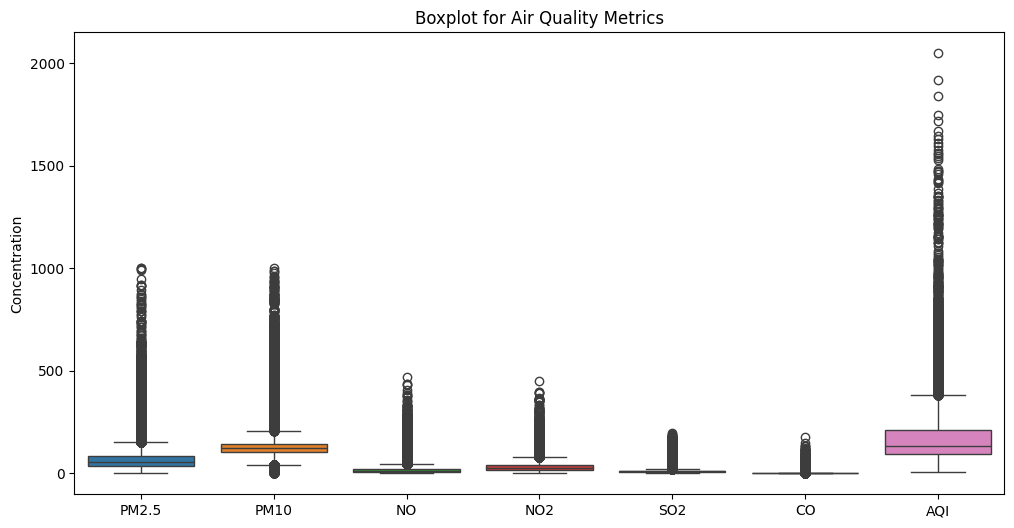

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['PM2.5', 'PM10', 'NO', 'NO2', 'SO2', 'CO', 'AQI']])
plt.title('Boxplot for Air Quality Metrics')
plt.ylabel('Concentration')
plt.show()

3. Count plot

The distribution of AQI levels across predefined categories or buckets (e.g., "Good", "Moderate", "Poor")

Insight: A high proportion of days fall into the "Unhealthy" category based on AQI bucket distribution.

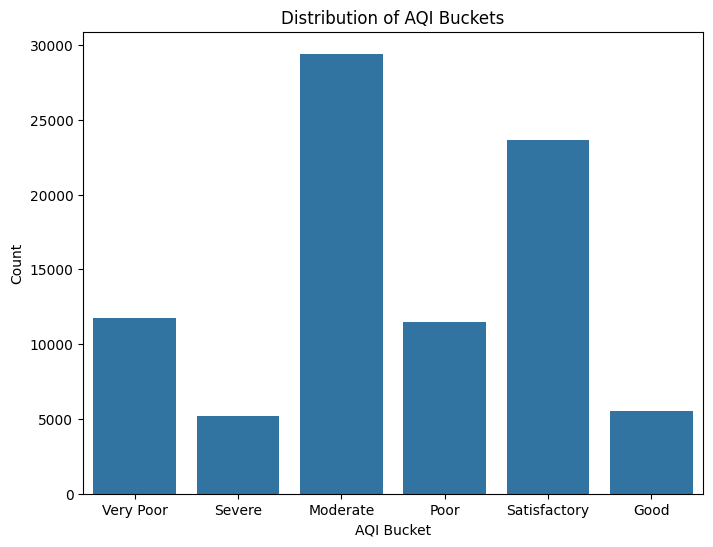

In [28]:
# AQI distribution (if you want to see how AQI is distributed in terms of buckets)
plt.figure(figsize=(8, 6))
sns.countplot(x='AQI_Bucket', data=data)
plt.title('Distribution of AQI Buckets')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.show()

4. Heatmap

Insight: PM2.5, PM10, and NO2 show the strongest correlation with AQI, indicating that these are the primary contributors.

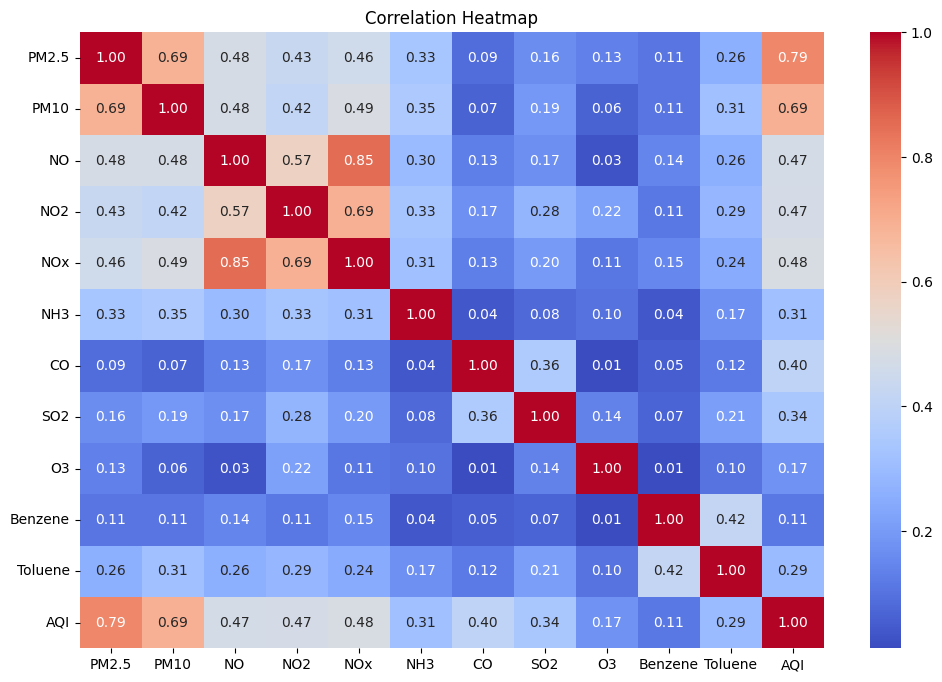

In [29]:
def plot_correlation_heatmap(data):
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(12, 8))
    corr = numeric_data.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(data)


5. Time series

Insight: Pollution levels are consistently higher during winter months (e.g., December and January). This may be due to lower temperatures trapping pollutants closer to the ground (thermal inversion) and increased use of heating.

Insight: Winter appears to be the most polluted season, likely due to atmospheric conditions and human activities.

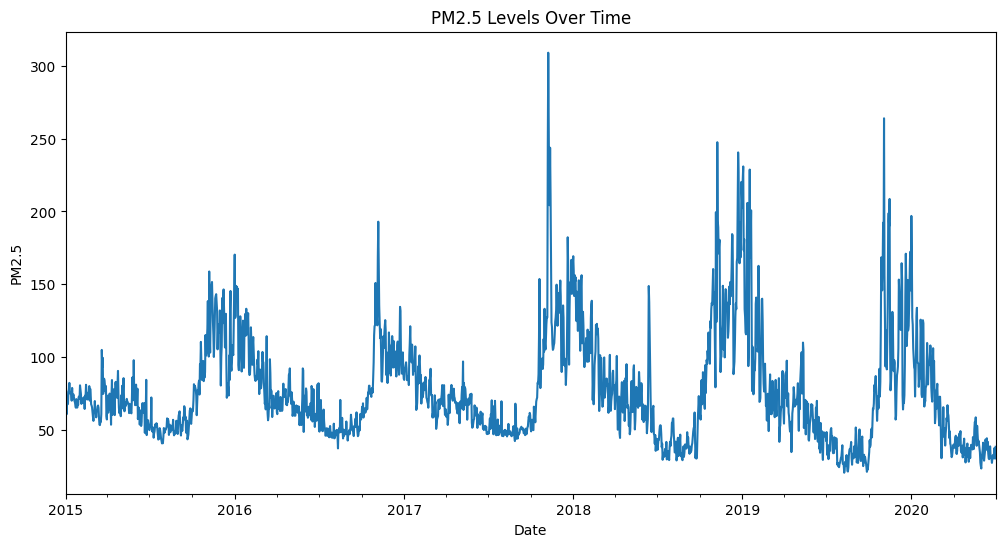

In [30]:
def plot_time_series(data, column, title):
    """Plots a time series for the specified column."""
    plt.figure(figsize=(12, 6))
    data.groupby('Date')[column].mean().plot()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.show()

plot_time_series(data, 'PM2.5', 'PM2.5 Levels Over Time')


## Web Scrapping

- air.plumelabs.com
- https://air.plumelabs.com/air-quality-in-Karachi-4VDy
- https://air.plumelabs.com/api/v1/week/4VDy/
- https://air.plumelabs.com/api/v1/year/4VDy/

In [31]:
import requests
import pandas as pd

# URL for the API
url = "https://air.plumelabs.com/api/v1/week/4VDy/"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    forecast_data = data.get("forecast", [])

    if not forecast_data:
        print("No forecast data found in the response.")
    else:
        rows = []
        for entry in forecast_data:
            if entry is None:
                continue

            timestamp = entry.get("timestamp")
            plume_index = entry.get("plume_index")
            plume_index_level = entry.get("plume_index_level")
            values = entry.get("values", {})
            no2 = values.get("NO2", {})
            o3 = values.get("O3", {})
            pm10 = values.get("PM10", {})
            pm25 = values.get("PM25", {})

            rows.append({
                "timestamp": timestamp,
                "plume_index": plume_index,
                "plume_index_level": plume_index_level,
                "NO2_aqi": no2.get("aqi"),
                "NO2_value_upm": no2.get("value_upm"),
                "O3_aqi": o3.get("aqi"),
                "O3_value_upm": o3.get("value_upm"),
                "PM10_aqi": pm10.get("aqi"),
                "PM10_value_upm": pm10.get("value_upm"),
                "PM25_aqi": pm25.get("aqi"),
                "PM25_value_upm": pm25.get("value_upm")
            })

        df = pd.DataFrame(rows)

        file_path = "plume_forecast_data_week.csv"
        df.to_csv(file_path, index=False)
        print(f"Data saved to {file_path}")
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")



Data saved to plume_forecast_data_week.csv


In [32]:
sp = pd.read_csv('plume_forecast_data_week.csv')
sp.head()

,timestamp,plume_index,plume_index_level,NO2_aqi,NO2_value_upm,O3_aqi,O3_value_upm,PM10_aqi,PM10_value_upm,PM25_aqi,PM25_value_upm
0,1735556400,95.0,3,NaN,6.67,NaN,115.16,NaN,29.79,NaN,28.61
1,1735560000,91.0,3,NaN,7.83,NaN,113.81,NaN,27.93,NaN,27.24
2,1735563600,110.0,4,NaN,20.24,NaN,93.12,NaN,36.64,NaN,36.06
3,1735567200,125.0,4,NaN,32.65,NaN,72.43,NaN,45.42,NaN,44.88
4,1735570800,129.0,4,NaN,45.06,NaN,51.74,NaN,48.15,NaN,47.65


#IQAIR  (Refrances)

- https://www.iqair.com/pakistan/sindh/karachi
- 'https://website-api.airvisual.com/v1/cities/eT4pi8yRKPGwFY3y5/measurements?units.temperature=celsius&units.distance=kilometer&units.pressure=millibar&units.system=metric&AQI=US&language=en'  


In [33]:
import requests
import pandas as pd

url = 'https://website-api.airvisual.com/v1/cities/eT4pi8yRKPGwFY3y5/measurements?units.temperature=celsius&units.distance=kilometer&units.pressure=millibar&units.system=metric&AQI=US&language=en'  # Replace with the actual API URL
headers = {'Authorization': 'Bearer https://website-api.airvisual.com/v1/cities/eT4pi8yRKPGwFY3y5/measurements?units.temperature=celsius&units.distance=kilometer&units.pressure=millibar&units.system=metric&AQI=US&language=en'}  # If authentication is needed


response = requests.get(url, headers=headers)


if response.status_code == 200:
    data = response.json()
    hourly_data = data.get('measurements', {}).get('daily', [])
    df_hourly = pd.DataFrame(hourly_data)
    if 'ts' in df_hourly.columns:
        df_hourly['ts'] = pd.to_datetime(df_hourly['ts'])

    file_path = "air_quality_data.csv"
    df_hourly.to_csv(file_path, index=False)
    print(f"Data saved to {file_path}")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Data saved to air_quality_data.csv


In [35]:
import pandas as pd

test_data = pd.read_csv('air_quality_data_year.csv')
test_data.rename(columns={
    'Timestamp': 'Date',
    'PM25 Value_UPM': 'PM2.5',
    'PM10 Value_UPM': 'PM10',
    'NO2 Value_UPM': 'NO2',
    'O3 Value_UPM': 'O3',

}, inplace=True)

columns_to_drop = ['Plume Index', 'Plume Index Level', 'NO2 AQI', 'NO2 AQI_AD', 'NO2 AQI_CN',
                   'NO2 CAQI', 'NO2 PI', 'O3 AQI', 'O3 AQI_AD', 'O3 AQI_CN', 'O3 CAQI',
                   'O3 PI', 'PM10 AQI', 'PM10 AQI_AD', 'PM10 AQI_CN', 'PM10 CAQI', 'PM10 PI',
                   'PM25 AQI', 'PM25 AQI_AD', 'PM25 AQI_CN', 'PM25 CAQI', 'PM25 PI']
test_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

required_columns = ['Date', 'PM2.5', 'PM10', 'NO2', 'O3','aqi',' so2']
test_data = test_data[required_columns]


test_data.fillna(0, inplace=True)
test_data.to_csv('processed_air_quality_data.csv', index=False)

test_data


,Date,PM2.5,PM10,NO2,O3,aqi,so2
0,1716768000,89,5.9176,4.2852,66.7753,0.0,15
1,1716854400,81,0.0000,3.7022,65.6827,126.0,13
2,1716940800,96,28.6653,4.9777,74.0794,110.0,24
3,1717027200,89,22.0849,6.1179,78.1592,98.0,23
4,1717113600,57,67.1921,6.2704,83.1549,128.0,15
...,...,...,...,...,...,...,...
74,1723161600,153,2.7669,4.9493,49.2508,176.0,7
75,1723248000,65,0.1830,4.1845,48.2336,170.0,6
76,1723334400,100,0.3269,4.4732,45.5070,161.0,11
77,1723420800,181,18.7212,5.9392,43.0696,153.0,13


In [36]:
test_data.shape

(79, 7)

In [37]:
k_features = test_data.drop(columns=['Date'])
k_features.columns = k_features.columns.str.upper()
K_target = k_features['AQI']
k_features.head()


,PM2.5,PM10,NO2,O3,AQI,SO2
0,89,5.9176,4.2852,66.7753,0.0,15
1,81,0.0000,3.7022,65.6827,126.0,13
2,96,28.6653,4.9777,74.0794,110.0,24
3,89,22.0849,6.1179,78.1592,98.0,23
4,57,67.1921,6.2704,83.1549,128.0,15


# Prepare Data for Modeling


In [42]:
# Prepare Data for Modeling
def prepare_data(data):
    """Prepares features and target variables for training and testing."""
    features = ['PM2.5', 'PM10','NO2', 'CO', 'SO2', 'O3']
    target = 'AQI'
    data = data.dropna(subset=features + [target])
    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = prepare_data(data)


# Train a Random Forest Model

In [47]:
def train_model(X_train, y_train):
    """Trains a Random Forest Regressor model."""
    model = RandomForestRegressor(random_state=42, n_estimators=10)
    model.fit(X_train, y_train)
    return model

model = train_model(X_train, y_train)

# Evaluate the Model


In [48]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model_normalized(model, X_test, y_test):
    """Evaluates the model and prints normalized key metrics."""
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    y_range = np.max(y_test) - np.min(y_test)
    normalized_mae = mae / y_range
    normalized_mse = mse / (y_range ** 2)
    normalized_rmse = rmse / y_range

    print("Mean Absolute Error (MAE):", normalized_mae)
    print("Mean Squared Error (MSE):", normalized_mse)
    print("Root Mean Squared Error (RMSE):", normalized_rmse)
    print("R-Squared (R2):", r2)

evaluate_model_normalized(model, X_test, y_test)


Mean Absolute Error (MAE): 0.016142693813625684
Mean Squared Error (MSE): 0.0006761430709823644
Root Mean Squared Error (RMSE): 0.026002751219483766
R-Squared (R2): 0.9306745976401489


#Testing Ahmedabad AQI

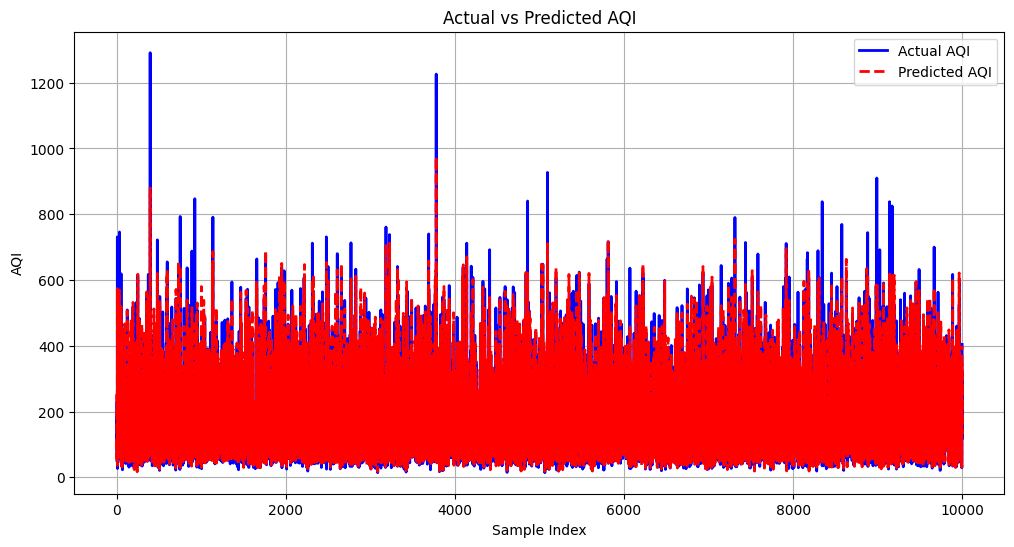

In [49]:
def visualize_actual_vs_predicted(y_test, y_pred):
    """Visualizes actual vs predicted values as separate lines."""
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual AQI', color='blue', linewidth=2)
    plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted AQI', color='red', linestyle='--', linewidth=2)
    plt.title('Actual vs Predicted AQI')
    plt.xlabel('Sample Index')
    plt.ylabel('AQI')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to visualize predictions
visualize_actual_vs_predicted(y_test, model.predict(X_test))


#Testing Karachi AQI


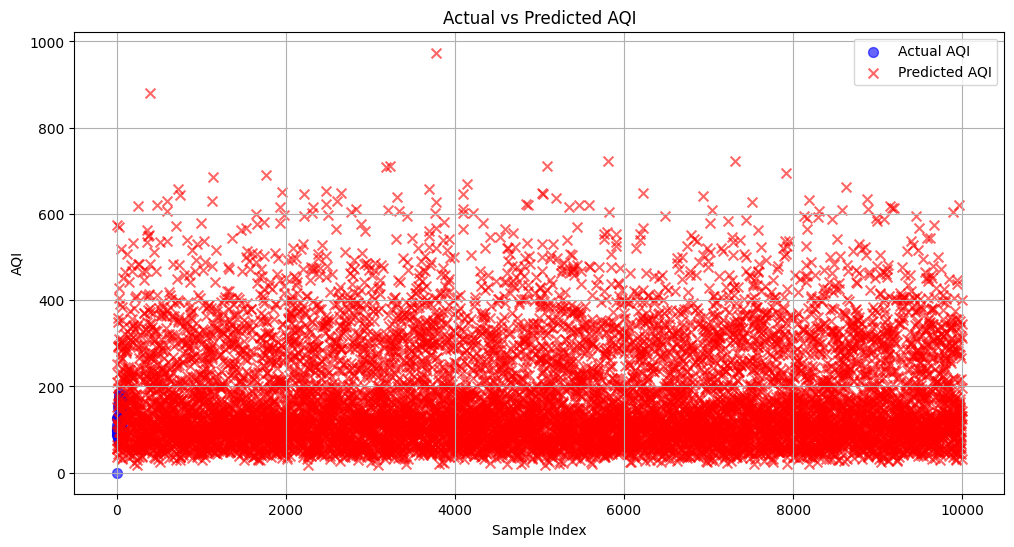

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_actual_vs_predicted(y_test, y_pred):
    """Visualizes actual vs predicted values as a scatter plot."""
    plt.figure(figsize=(12, 6))


    plt.scatter(np.arange(len(K_target)), K_target, label='Actual AQI', color='blue', s=50, alpha=0.6)


    plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted AQI', color='red', s=50, alpha=0.6, marker='x')

    plt.title('Actual vs Predicted AQI')
    plt.xlabel('Sample Index')
    plt.ylabel('AQI')
    plt.legend()
    plt.grid(True)
    plt.show()

y_pred = model.predict(X_test)
visualize_actual_vs_predicted(y_test, y_pred)

# Feature Importance

Insight:
PM2.5 and PM10: Likely from vehicular emissions, industrial activities, and construction.
NO2: Likely from traffic and industrial combustion.
CO: Likely from incomplete combustion in vehicles.


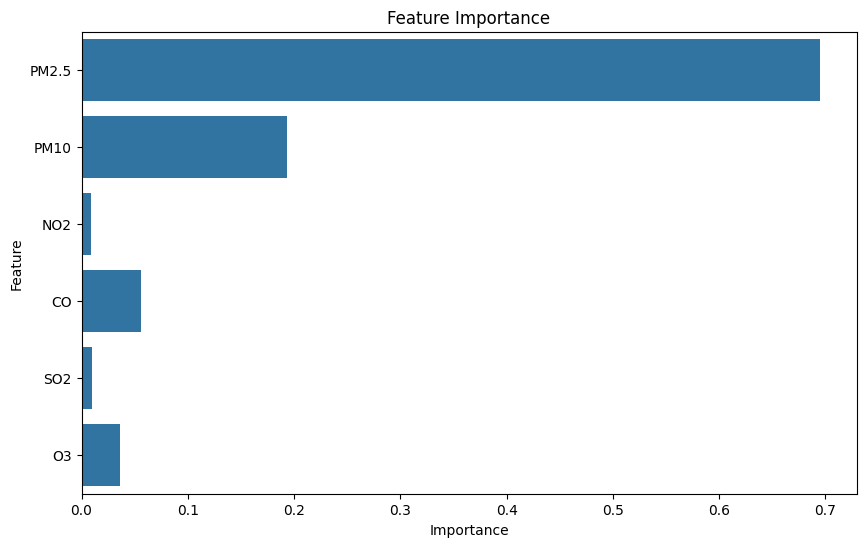

In [51]:
# Feature Importance
def plot_feature_importance(model, feature_names):
    """Plots feature importance for the trained model."""
    importance = model.feature_importances_
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=feature_names)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

plot_feature_importance(model, X_train.columns)

In [52]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

def train_gradient_boosting_model(X_train, y_train):
    """Trains a Gradient Boosting Regressor model."""
    model = GradientBoostingRegressor(random_state=42, n_estimators=20, learning_rate=0.1, max_depth=3)
    model.fit(X_train, y_train)
    return model

model_gb = train_gradient_boosting_model(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    """Evaluates the model and prints key metrics."""
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    y_range = np.max(y_test) - np.min(y_test)
    normalized_mse = mse / (y_range ** 2)

    print("Mean Absolute Error (MAE):", mae)
    print("Normalized Mean Squared Error (MSE):", normalized_mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-Squared (R2):", r2)

evaluate_model(model_gb, X_test, y_test)


Mean Absolute Error (MAE): 28.455519162694983
Normalized Mean Squared Error (MSE): 0.0010327698900342496
Root Mean Squared Error (RMSE): 41.038613646243725
R-Squared (R2): 0.8941094107971256


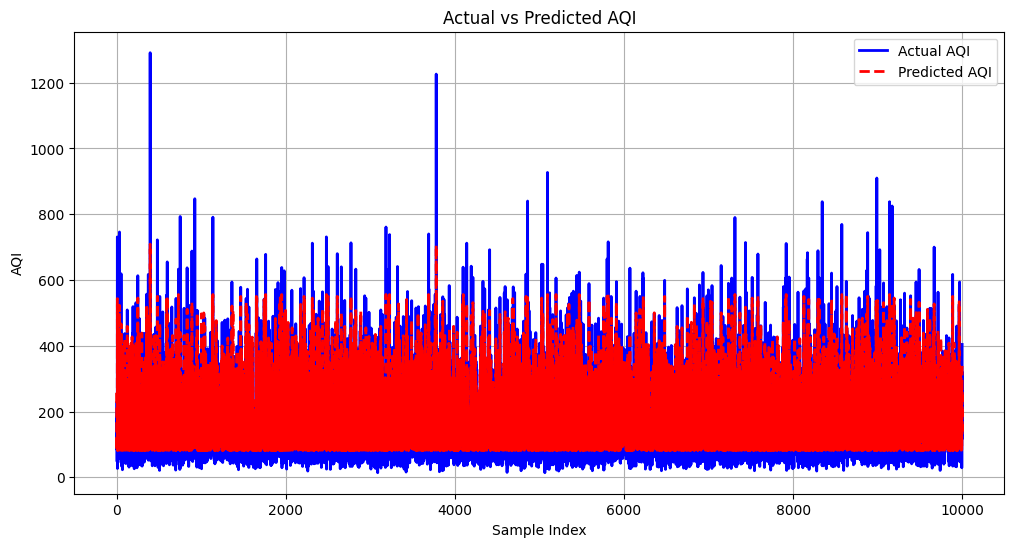

In [53]:
def visualize_actual_vs_predicted(y_test, y_pred):
    """Visualizes actual vs predicted values as separate lines."""
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual AQI', color='blue', linewidth=2)
    plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted AQI', color='red', linestyle='--', linewidth=2)
    plt.title('Actual vs Predicted AQI')
    plt.xlabel('Sample Index')
    plt.ylabel('AQI')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to visualize predictions
visualize_actual_vs_predicted(y_test, model_gb.predict(X_test))


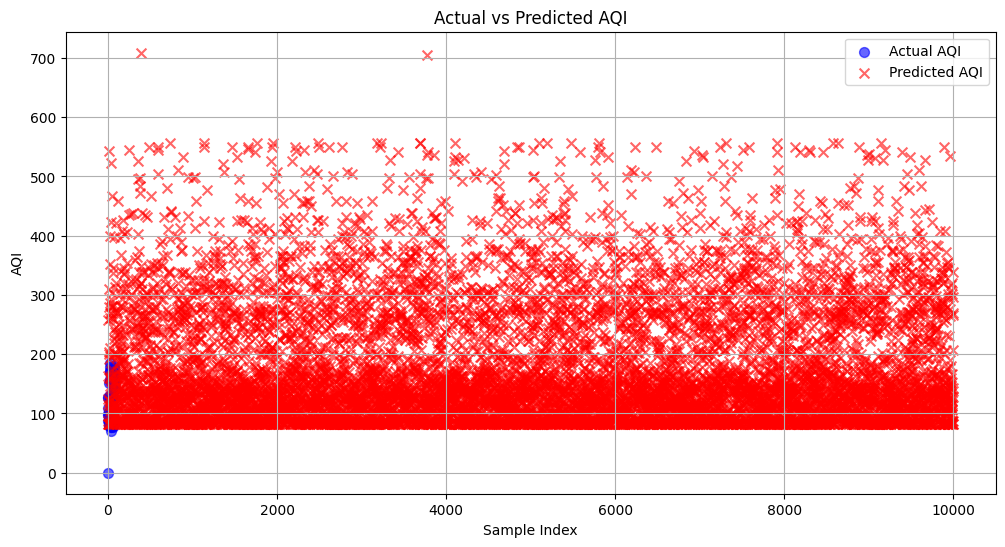

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_actual_vs_predicted(y_test, y_pred):
    """Visualizes actual vs predicted values as a scatter plot."""
    plt.figure(figsize=(12, 6))

    plt.scatter(np.arange(len(K_target)), K_target, label='Actual AQI', color='blue', s=50, alpha=0.6)

    plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted AQI', color='red', s=50, alpha=0.6, marker='x')

    plt.title('Actual vs Predicted AQI')
    plt.xlabel('Sample Index')
    plt.ylabel('AQI')
    plt.legend()
    plt.grid(True)
    plt.show()


visualize_actual_vs_predicted(y_test, model_gb.predict(X_test))

In [55]:
from sklearn.linear_model import LinearRegression

def train_linear_regression_model(X_train, y_train):
    """Trains a Linear Regression model."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model_lr = train_linear_regression_model(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    """Evaluates the model and prints key metrics."""
    y_pred = model.predict(X_test)
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-Squared (R2):", r2_score(y_test, y_pred))

evaluate_model(model_lr, X_test, y_test)


Mean Absolute Error (MAE): 29.000922971962265
Mean Squared Error (MSE): 1848.90795741925
Root Mean Squared Error (RMSE): 42.99892972411348
R-Squared (R2): 0.8837515170223155


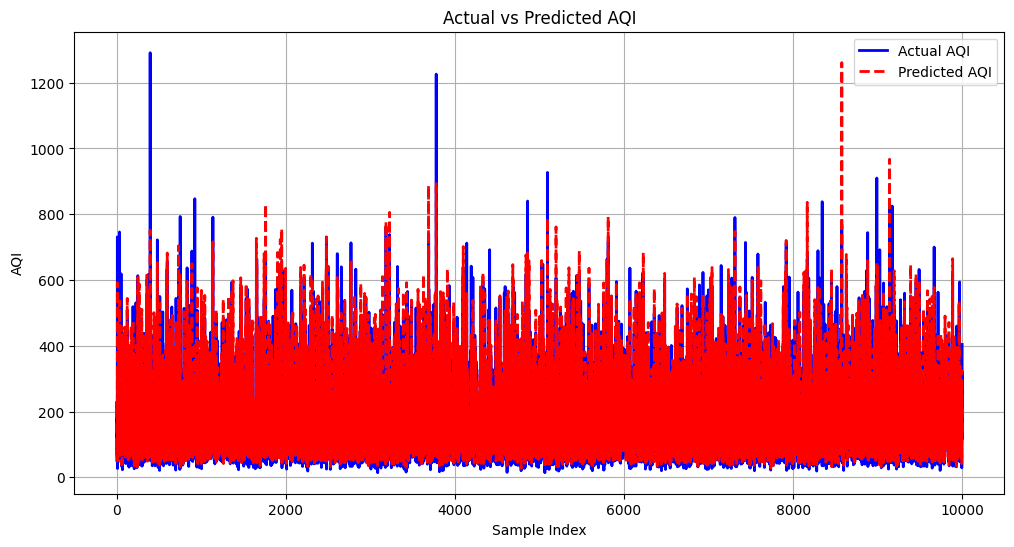

In [56]:
def visualize_actual_vs_predicted(y_test, y_pred):
    """Visualizes actual vs predicted values as separate lines."""
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual AQI', color='blue', linewidth=2)
    plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted AQI', color='red', linestyle='--', linewidth=2)
    plt.title('Actual vs Predicted AQI')
    plt.xlabel('Sample Index')
    plt.ylabel('AQI')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to visualize predictions
visualize_actual_vs_predicted(y_test, model_lr.predict(X_test))


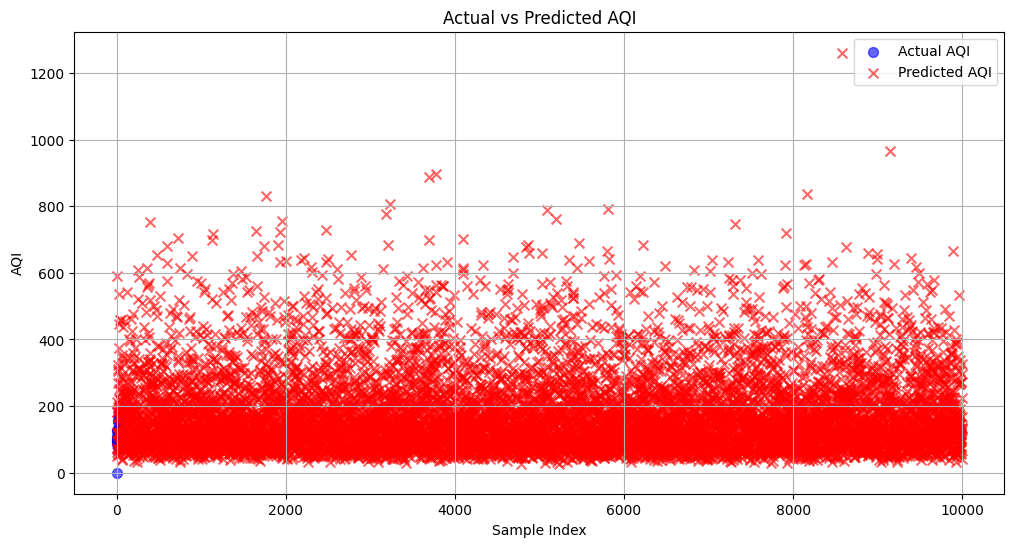

In [57]:
def visualize_actual_vs_predicted(y_test, y_pred):
    """Visualizes actual vs predicted values as separate lines."""
    plt.figure(figsize=(12, 6))
    plt.scatter(np.arange(len(K_target)), K_target, label='Actual AQI', color='blue', s=50, alpha=0.6)
    plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted AQI', color='red', s=50, alpha=0.6, marker='x')

    plt.title('Actual vs Predicted AQI')
    plt.xlabel('Sample Index')
    plt.ylabel('AQI')
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_actual_vs_predicted(y_test, model_lr.predict(X_test))


# Saveing the Model for GUI (Gradio)

In [58]:
import joblib
print("Pipeline complete: Data cleaning, visualization, modeling, and evaluation.")

Pipeline complete: Data cleaning, visualization, modeling, and evaluation.


In [59]:
def save_outputs(data, model, model_path='aqi_prediction_model.pkl'):
    """Saves the cleaned dataset and trained model."""

    joblib.dump(model, model_path)
    print("Model saved to:", model_path)

save_outputs(data, model)

Model saved to: aqi_prediction_model.pkl


In [60]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [61]:
import gradio as gr
import joblib
import pandas as pd


model = joblib.load('aqi_prediction_model.pkl')

def predict_aqi(PM2_5, PM10, NO2, CO, SO2, O3):
    """Predict AQI based on the input features using the trained model."""

    input_data = pd.DataFrame([[PM2_5, PM10, NO2, CO, SO2, O3]],
                              columns=['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3'])


    try:
        predicted_aqi = model.predict(input_data)[0]
        return f"Predicted AQI: {predicted_aqi}"
    except Exception as e:
        return f"Error in prediction: {str(e)}"

inputs = [
    gr.Number(label='PM2.5'),
    gr.Number(label='PM10'),
    gr.Number(label='NO2'),
    gr.Number(label='CO'),
    gr.Number(label='SO2'),
    gr.Number(label='O3')
]

outputs = gr.Textbox(label="Predicted AQI")

gr.Interface(fn=predict_aqi, inputs=inputs, outputs=outputs, title="AQI Prediction",
             description="Enter the values of air pollutants to predict AQI").launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://22325f3791a08520a4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **Insights**  (Based on Analysis)

1. How does air quality vary over time (daily, monthly, or annually)?

Insight: Air quality exhibits daily and monthly fluctuations. Specific pollutants like PM2.5 and PM10 show spikes during certain months, likely related to seasonal activities such as winter heating or increased industrial output.

Example Time series plots for pollutants (e.g., PM2.5, PM10, NO2) show noticeable trends over time.


2. Is there specific months when pollution levels are consistently higher?

Insight: Pollution levels are consistently higher during winter months (e.g., December and January). This may be due to lower temperatures trapping pollutants closer to the ground (thermal inversion) and increased use of heating.

Example: Peaks in PM2.5 and PM10 levels during these months in time series plots.


3. Is there specific season when pollution levels are consistently higher?

Insight: Winter appears to be the most polluted season, likely due to atmospheric conditions and human activities.

Example: Seasonal patterns in PM2.5 and PM10 plots.


4. Which pollutants have the most significant impact on AQI (e.g., PM2.5, PM10, CO, NO2)?

Insight: PM2.5, PM10, and NO2 show the strongest correlation with AQI, indicating that these are the primary contributors.

Example: Correlation heatmap highlights strong relationships between these pollutants and AQI.

5. What are the primary sources of the key pollutants?

Insight:
PM2.5 and PM10: Likely from vehicular emissions, industrial activities, and construction.
NO2: Likely from traffic and industrial combustion.
CO: Likely from incomplete combustion in vehicles.

Example: Trends and correlations suggest the sources based on common pollutant origins.

6. Can the model accurately predict future AQI levels to help authorities and individuals prepare for poor air quality days?

Insight: Prediction capability depends on the model's performance and dataset quality. Time series analysis provides the foundation for building predictive models using algorithms like ARIMA, LSTM, etc.

Example: Observed temporal trends in pollutant levels.

7. How many days per year are categorized as "unhealthy" or worse according to AQI standards?

Insight: A high proportion of days fall into the "Unhealthy" category based on AQI bucket distribution.

Example AQI bucket countplot provides a breakdown of days by category.

8. What steps can individuals take to minimize exposure during periods of poor air quality?

Insight:
Limit outdoor activities during high AQI periods.
Use air purifiers and masks.

Example: Periods of high PM2.5 and PM10 levels suggest times to avoid outdoor exposure.

## **Future Work**

The dataset does not contain geographical segmentation, but additional data can be integrated to answer this question.